In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

class transform:
    def __init__(self,path,ksize = 7,depth = .7):
        self.path = path
        self.image = cv2.imread(path)
        self.image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.new = None
        self.k_size = ksize
        self.depth = depth
    def convert(self):
        grey_img = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        invert_img=cv2.bitwise_not(grey_img)
        blur_img=cv2.GaussianBlur(invert_img, (self.k_size,self.k_size),0)
        invblur_img=cv2.bitwise_not(blur_img)
        self.new=cv2.divide(grey_img,invblur_img, scale=256.0)
        return self.new

    def display(self):
        if self.new == None:
            _ = self.convert()
        fig = plt.figure()
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(self.image_rgb)
        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(self.minimize(self.new), cmap = 'gray')
    def minimize(self,data):
        data = data/data.max()
        data -= data.min()
        return np.clip(data - (data.max()*self.depth),0,1)


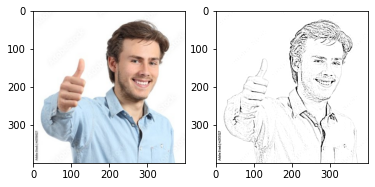

In [3]:
path = 'pic1.jpg'
sketcher = transform(path)
sketcher.display()